<a href="https://colab.research.google.com/github/kunalpagarey/PyTocrh_Tutorial/blob/master/PyTorch_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from sklearn import datasets    # to create linearly separable dataset.
import numpy as np
import matplotlib.pyplot as plt  

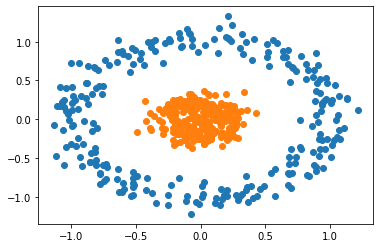

In [3]:
n_pts = 500
X, Y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(Y.reshape(500, 1))
def scatter_plot():
    plt.scatter(X[Y==0, 0], X[Y==0, 1])
    plt.scatter(X[Y==1, 0], X[Y==1, 1])

scatter_plot()

In [0]:
class LogisticRegression(nn.Module):
    def __init__(self, in_f, hidden_dim, out_f):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(in_f, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, out_f)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        pred = torch.sigmoid(self.linear2(x))
        return pred
    
    def predict(self, pred):
        pred = (pred >= 0.5).long()
        return pred
        

In [102]:
torch.manual_seed(2)
model = LogisticRegression(x_data.shape[1], 4, y_data.shape[1])
print(model)
print(list(model.parameters()))

LogisticRegression(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [104]:
epochs = 1000
losses = []

for e in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss)
    print("Epoch: {}, Loss: {}".format(e, loss.item()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 0.7148522138595581
Epoch: 1, Loss: 0.6947320699691772
Epoch: 2, Loss: 0.6955163478851318
Epoch: 3, Loss: 0.7014891505241394
Epoch: 4, Loss: 0.7013985514640808
Epoch: 5, Loss: 0.6974702477455139
Epoch: 6, Loss: 0.6939254403114319
Epoch: 7, Loss: 0.6928594708442688
Epoch: 8, Loss: 0.6939384937286377
Epoch: 9, Loss: 0.6954389810562134
Epoch: 10, Loss: 0.6958749294281006
Epoch: 11, Loss: 0.6949177384376526
Epoch: 12, Loss: 0.6931487321853638
Epoch: 13, Loss: 0.6913900375366211
Epoch: 14, Loss: 0.6901611089706421
Epoch: 15, Loss: 0.6894587874412537
Epoch: 16, Loss: 0.6888436079025269
Epoch: 17, Loss: 0.6877667307853699
Epoch: 18, Loss: 0.685900866985321
Epoch: 19, Loss: 0.6832477450370789
Epoch: 20, Loss: 0.6800417304039001
Epoch: 21, Loss: 0.6765585541725159
Epoch: 22, Loss: 0.6729682087898254
Epoch: 23, Loss: 0.6692693829536438
Epoch: 24, Loss: 0.6653285026550293
Epoch: 25, Loss: 0.6609663963317871
Epoch: 26, Loss: 0.6560587882995605
Epoch: 27, Loss: 0.6505836248397827
Epo

Text(0, 0.5, 'Loss')

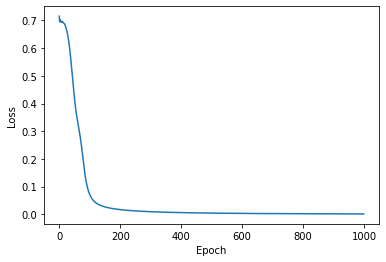

In [105]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [0]:
# Plot decision boundary.

def plot_decision_boundary(X):
    x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
    y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

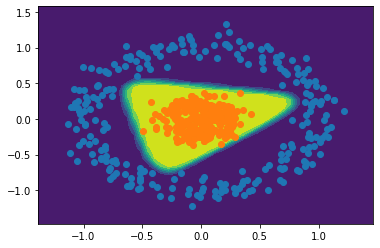

In [107]:
plot_decision_boundary(X)
scatter_plot()

Prediction is:  tensor([[1],
        [0]])


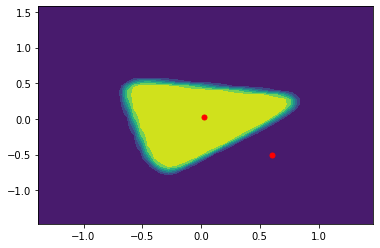

In [111]:
test = torch.Tensor([[0.025, 0.025], [0.6, -0.5]])
p = model(test)
prediction = model.predict(p)
plt.plot(test[:, 0], test[:, 1], "or", markersize=5)
print("Prediction is: ", prediction)
plot_decision_boundary(X)